# Data Analyst Professional Practical Exam Submission

Author: Mauro Cesar


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

### How Many Customers were there for each approach? 
Email method was the method with more customers as seen below:
- Email: 7.5K customers
- Call: 5K customers
- Call + Email: 2.5K

![image](image.png)


### Distribution of Revenue
The revenue distribution are pretty concentraded without big outliers 
![revenue distribution](revenue%20distribution.png)

### Revenue by sales method
Email+ Call method is the one with the highest revenue and only call is the one with the lowest revenue.

![revenue_by_sales_method](revenue_by_sales_method.png)


### Revenue over time by sales method
- "Email + Call" method have increased revenues consistenly, and in the last 2 weeks is the method with the highest revenue by far. 
- In the otherhand, 'Email' started particularly high and decreased it's revenue constantly over the weeks.
![revenue_over_time_by_sale_method](revenue_over_time_by_sale_method.png)
- The average revenue of 'Email + Call" is consistenly higher compared to other sales mehthod, but is in a positive trend over the last weeks
![avreage revenue per sales mehod over time](avreage%20revenue%20per%20sales%20mehod%20over%20time.png)


## Business Metrics
- Metric: Average revenue per customer
- Threshold = $180,because it is the lower than weekly average on the last 3 months.

## Recommendation
I would recommend we can focus on the following steps:
- Implement the "Email + Call" method as soon as possible. 
    - Optimize the email with client feedback and sales data
    - Trainning and monitor call quality
- Using key metrics like average revenue per customer to monoitor whether there is a strong sign to see.
- Monitor the market and the sales to identify the best products on the segment
- Create retention strategies as well to promote more purchases from the same client
- New Data: 
    - Understand which products the customers like the most.
    - Suggest products based on user preferences.
    - Understand what made the performance improvement on the last weeks.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

# Appendix

### Imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

### Load Data

In [2]:
# Read data from 'toyota.csv' and store it in a dataset
product_sales = pd.read_csv('product_sales.csv', index_col=None)

# Print numes of rows x columns
print(f"Number of rows/records: {product_sales.shape[0]}")
print(f"Number of columns/variables: {product_sales.shape[1]}")

# Print Head of dataframe
product_sales

Number of rows/records: 15000
Number of columns/variables: 8


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


### Data Validation

In [3]:
print(product_sales.info())
product_sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [4]:
n_users = product_sales['customer_id'].nunique()
print(f"There are {n_users} unique customers")

# Check possible values in each column
nom_num = ['sales_method', 'state', 'week']

# Check possible values in each column
for column in nom_num:
    possible_values = np.sort(product_sales[column].unique())
    n_values = len(possible_values) 
    print(f"There are {n_values} possible values in column '{column}': {possible_values}")

There are 15000 unique customers
There are 5 possible values in column 'sales_method': ['Call' 'Email' 'Email + Call' 'em + call' 'email']
There are 50 possible values in column 'state': ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
There are 6 possible values in column 'week': [1 2 3 4 5 6]


### Fix Values 
- Correct categories for sales method

In [5]:
# Define a mapping dictionary to correct the inconsistent values
replacement_dict = {
    'em + call': 'Email + Call',
    'email': 'Email'
}
# Apply the mapping to the 'sales_method' column
product_sales['sales_method'] = product_sales['sales_method'].replace(replacement_dict)
product_sales['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

### Null Values 
- Insert Median by each category for null values for price 
    - it's not 0 because it does not make sense Call Method having less nulls and lower average revenue

In [6]:

# Count the number of null customer IDs per sales method
null_counts = product_sales[product_sales['revenue'].isnull()].groupby('sales_method').size()

# Count total customers per sales method
total_counts = product_sales.groupby('sales_method')['customer_id'].count()

average_revenue = product_sales.groupby('sales_method')['revenue'].mean()
median_revenue = product_sales.groupby('sales_method')['revenue'].median()

# Calculate the percentage of nulls
percentage_nulls = (null_counts / (total_counts + null_counts)) * 100

# Combine results into a DataFrame for better visualization
results = pd.DataFrame({
    'Null Count': null_counts,
    'Total Customers': total_counts,
    'Percentage Nulls': percentage_nulls, 
    'Average revenue': average_revenue, 
    'Median revenue': median_revenue
})

# Display results
results

,Null Count,Total Customers,Percentage Nulls,Average revenue,Median revenue
sales_method,,,,,
Call,181,4962,3.519347,47.597467,49.07
Email,544,7466,6.791511,97.127684,95.58
Email + Call,349,2572,11.947963,183.651233,184.74


In [7]:
median_revenue_by_method = product_sales.groupby('sales_method')['revenue'].median()
# product_sales["revenue"].fillna(median_revenue, inplace=True)

product_sales['revenue'] = product_sales.apply(
    lambda row: median_revenue_by_method[row['sales_method']] if pd.isnull(row['revenue']) else row['revenue'],
    axis=1
)

print(product_sales.info())

median_revenue = product_sales.groupby('sales_method')['revenue'].median()
median_revenue

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


sales_method
Call             49.07
Email            95.58
Email + Call    184.74
Name: revenue, dtype: float64

# Exploratory Data Analysis 

We need to know:
- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would you recommend we continue to use? 
 
Some of these methods take more time from the team so they may not be the best for us
to use if the results are similar.

Email method were the ones with more customers as seen below:
- Email: 7.5K customers
- Call: 5K customers
- Call + Email: 2.5K

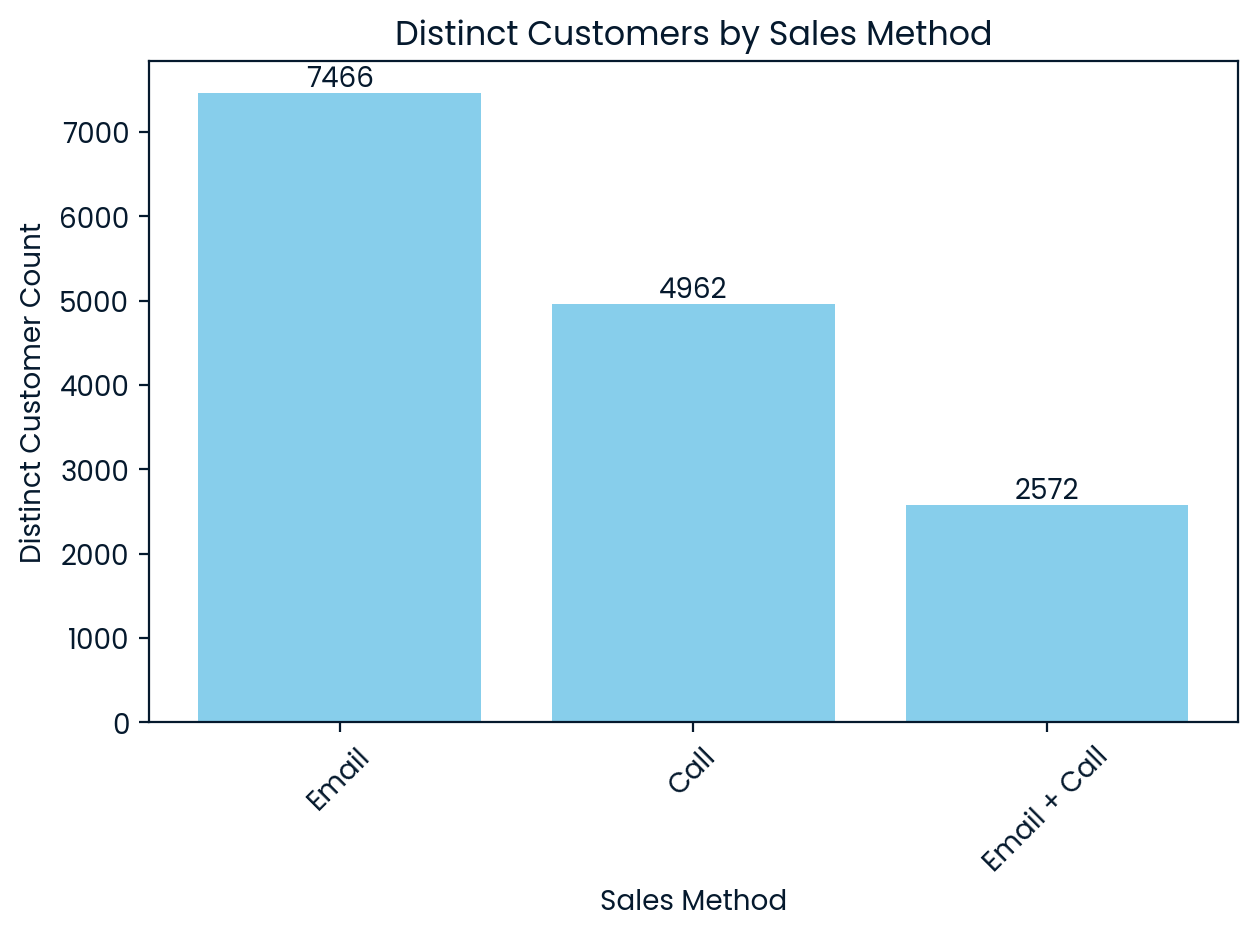

In [8]:

# Assuming product_sales DataFrame has a 'customer_id' column
# Count distinct customers per sales method
distinct_customers_by_method = product_sales.groupby('sales_method')['customer_id'].nunique().sort_values(ascending=False)

# Create a bar chart
plt.bar(distinct_customers_by_method.index.astype(str), distinct_customers_by_method.values, color='skyblue')  # Convert index to string for better x-axis labels

# Add labels and title
plt.xlabel('Sales Method')
plt.ylabel('Distinct Customer Count')
plt.title('Distinct Customers by Sales Method')

# Add customer count labels to each bar
for i, count in enumerate(distinct_customers_by_method.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the chart
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

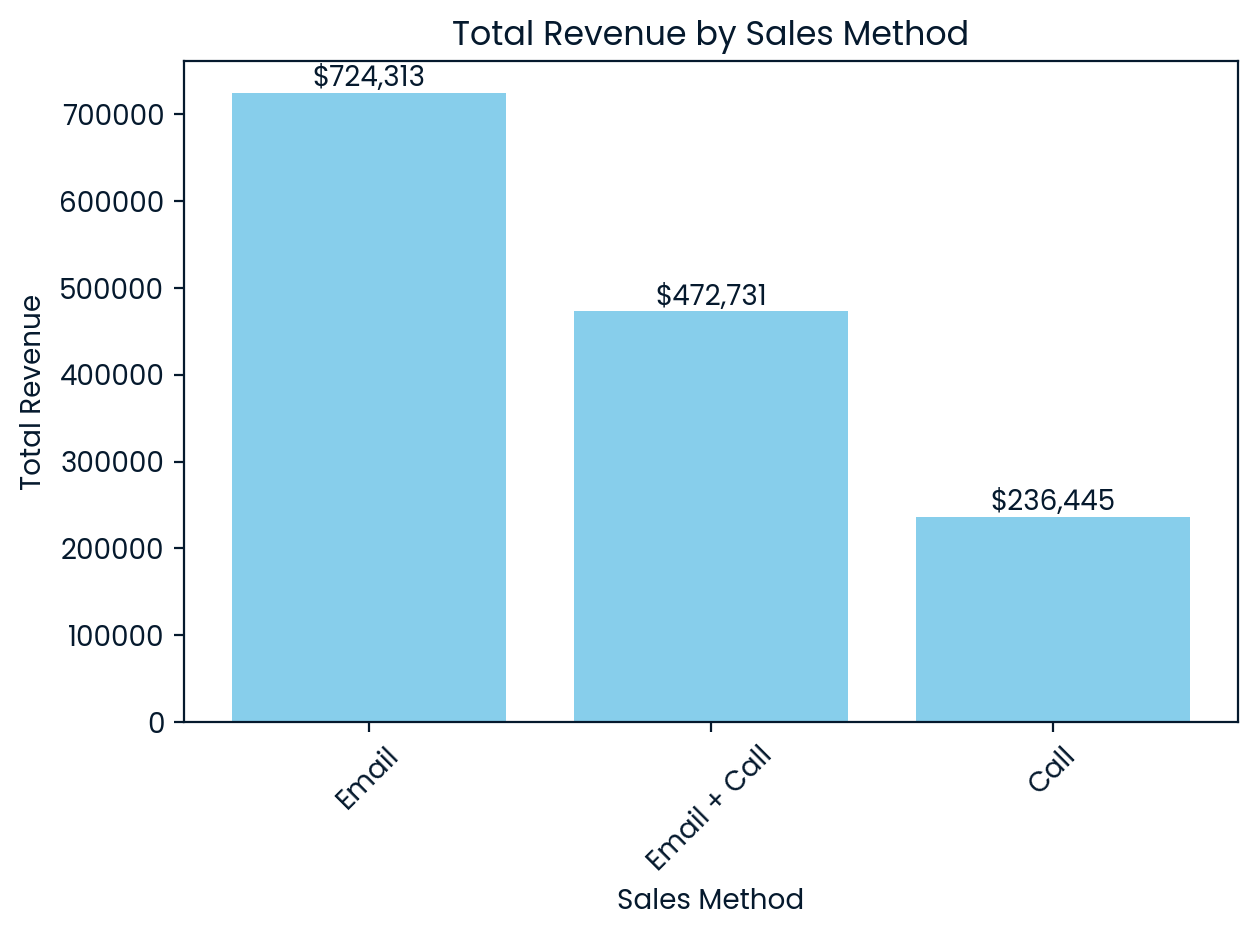

In [9]:
# Assuming product_sales DataFrame has a 'revenue' column
# Sum the revenues per sales method
sales_by_method = product_sales.groupby('sales_method')['revenue'].sum().sort_values(ascending=False)

# Create a bar chart
plt.bar(sales_by_method.index.astype(str), sales_by_method.values, color='skyblue')  # Convert index to string for better x-axis labels

# Add labels and title
plt.xlabel('Sales Method')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Sales Method')

# Add revenue labels to each bar
for i, revenue in enumerate(sales_by_method.values):
    plt.text(i, revenue, f'${revenue:,.0f}', ha='center', va='bottom')  # Format as currency

# Display the chart
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

### Distribution of Revenue

In [10]:

# Calculate overall revenue statistics
overall_stats = {
    'Mean': product_sales['revenue'].mean(),
    'Median': product_sales['revenue'].median(),
    'Standard Deviation': product_sales['revenue'].std(),
    'Min': product_sales['revenue'].min(),
    'Max': product_sales['revenue'].max(),
    'Range': product_sales['revenue'].max() - product_sales['revenue'].min()
}

# Calculate revenue statistics by sales method
method_stats = product_sales.groupby('sales_method')['revenue'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

# Calculate range for each method
method_stats['range'] = method_stats['max'] - method_stats['min']

# Display overall statistics
print("Overall Revenue Statistics:")
print(overall_stats)

# Display statistics by sales method
print("\nRevenue Statistics by Sales Method:")
print(method_stats)

Overall Revenue Statistics:
{'Mean': 95.565964, 'Median': 90.95, 'Standard Deviation': 47.985181822124396, 'Min': 32.54, 'Max': 238.32, 'Range': 205.78}

Revenue Statistics by Sales Method:
   sales_method        mean  median        std     min     max   range
0          Call   47.651181   49.07   8.455884   32.54   71.36   38.82
1         Email   97.014914   95.58  10.801764   78.83  148.97   70.14
2  Email + Call  183.798970  184.74  27.040536  122.11  238.32  116.21


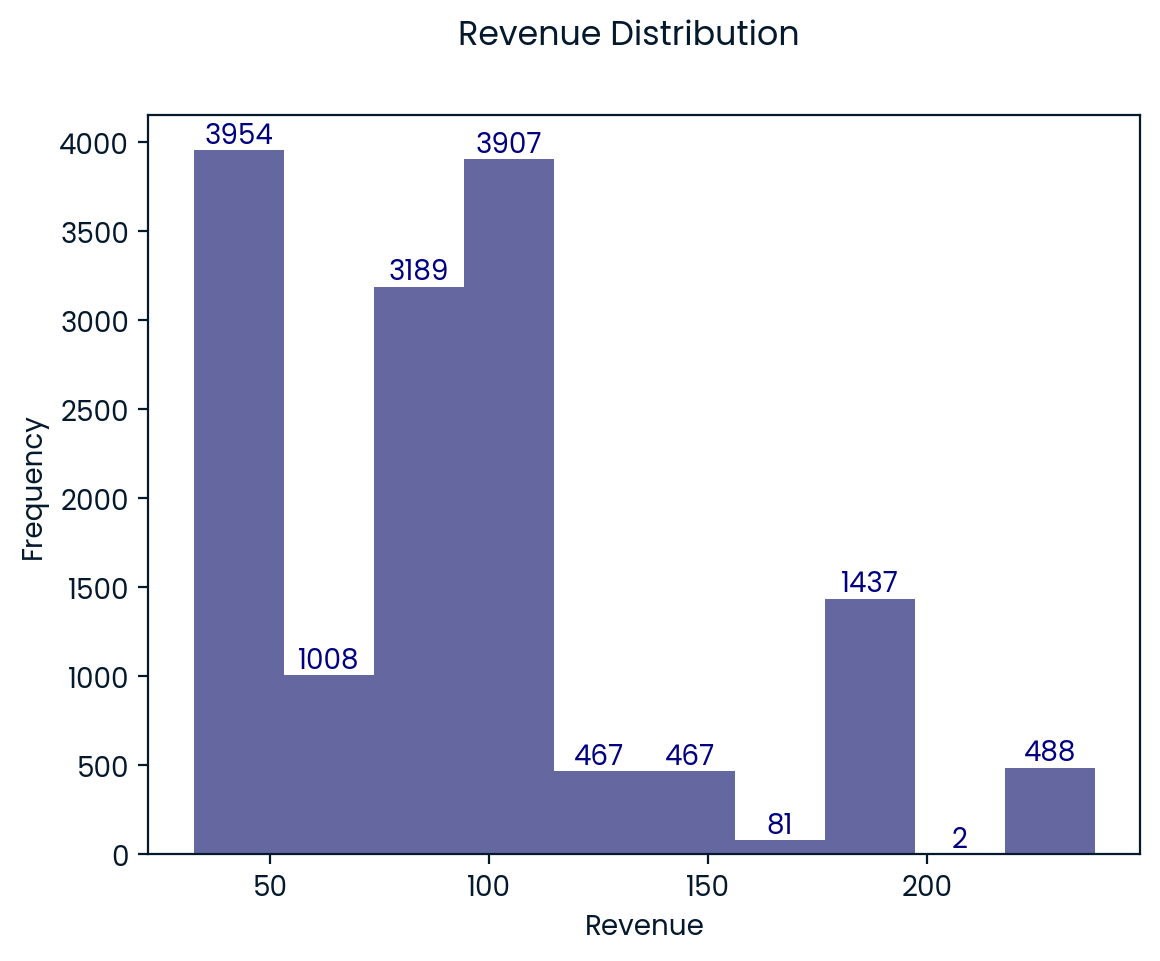

In [11]:
# Create a histogram of the number of reviews, capping the number of reviews at 3000
values, bins, bars = plt.hist(product_sales['revenue'], bins=10)

# Add labels and title
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.suptitle('Revenue Distribution')
# plt.title('Places with less than 3000 reviews, to remove outliers', fontsize = 10)
plt.bar_label(bars,  color='navy')

# Display the histogram
plt.show()

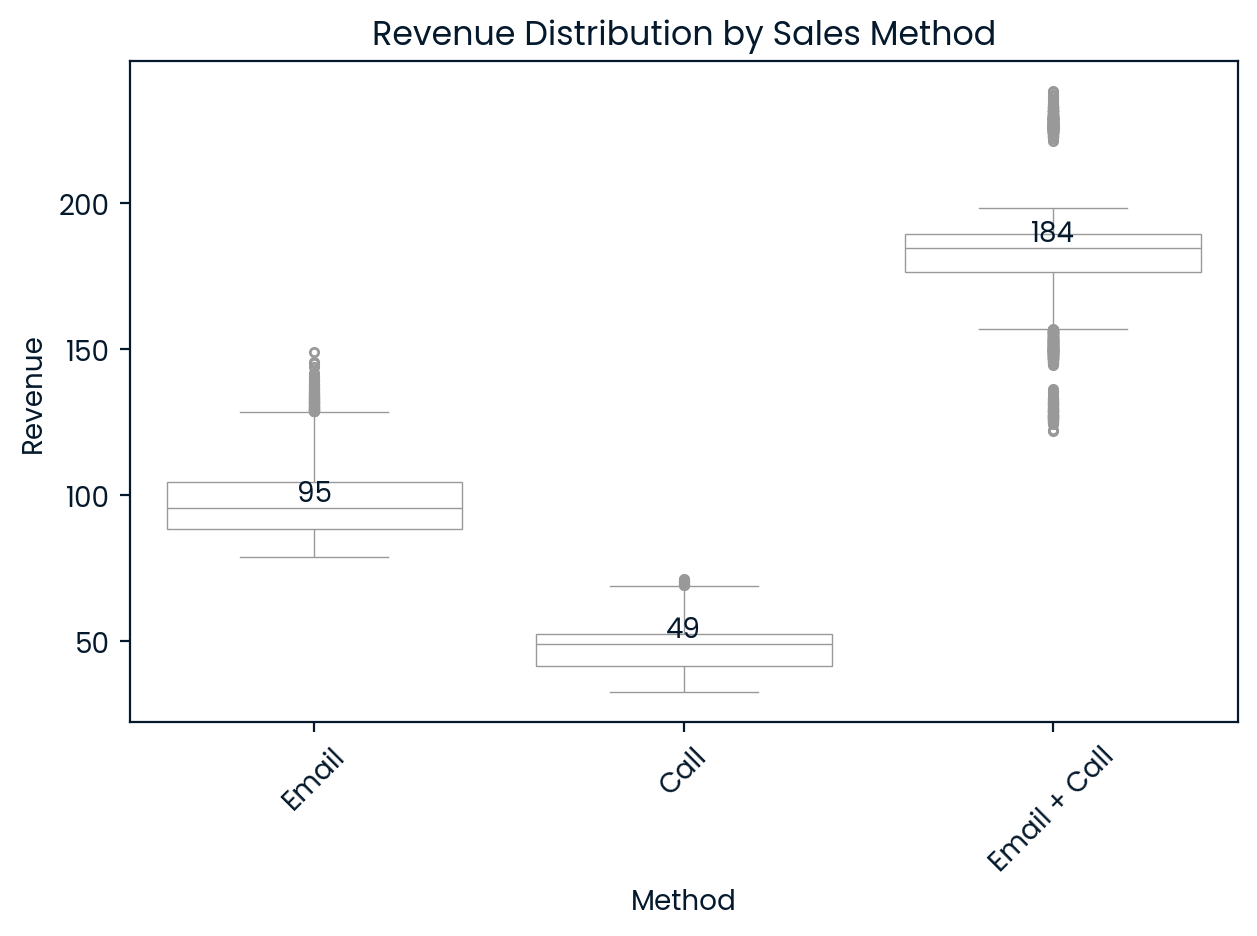

In [12]:

# Revenue
sales_per_method = product_sales['sales_method'].value_counts().index.tolist()

# Create a box plot ordered by sales count
sns.boxplot(data=product_sales, x='sales_method', y='revenue', order= sales_per_method, color='white', linewidth=0.5, fliersize=3)

# Add a label with the price
medians = product_sales.groupby('sales_method')['revenue'].median()

for i, median in enumerate(medians[sales_per_method]):
    # print(i, median)
    plt.text(i, median, str(int(median)), horizontalalignment='center', verticalalignment='bottom')

# Add labels and title
plt.xlabel('Method')
plt.ylabel('Revenue')
plt.title('Revenue Distribution by Sales Method')

# Display the chart
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

### Revenue Over time by the methods

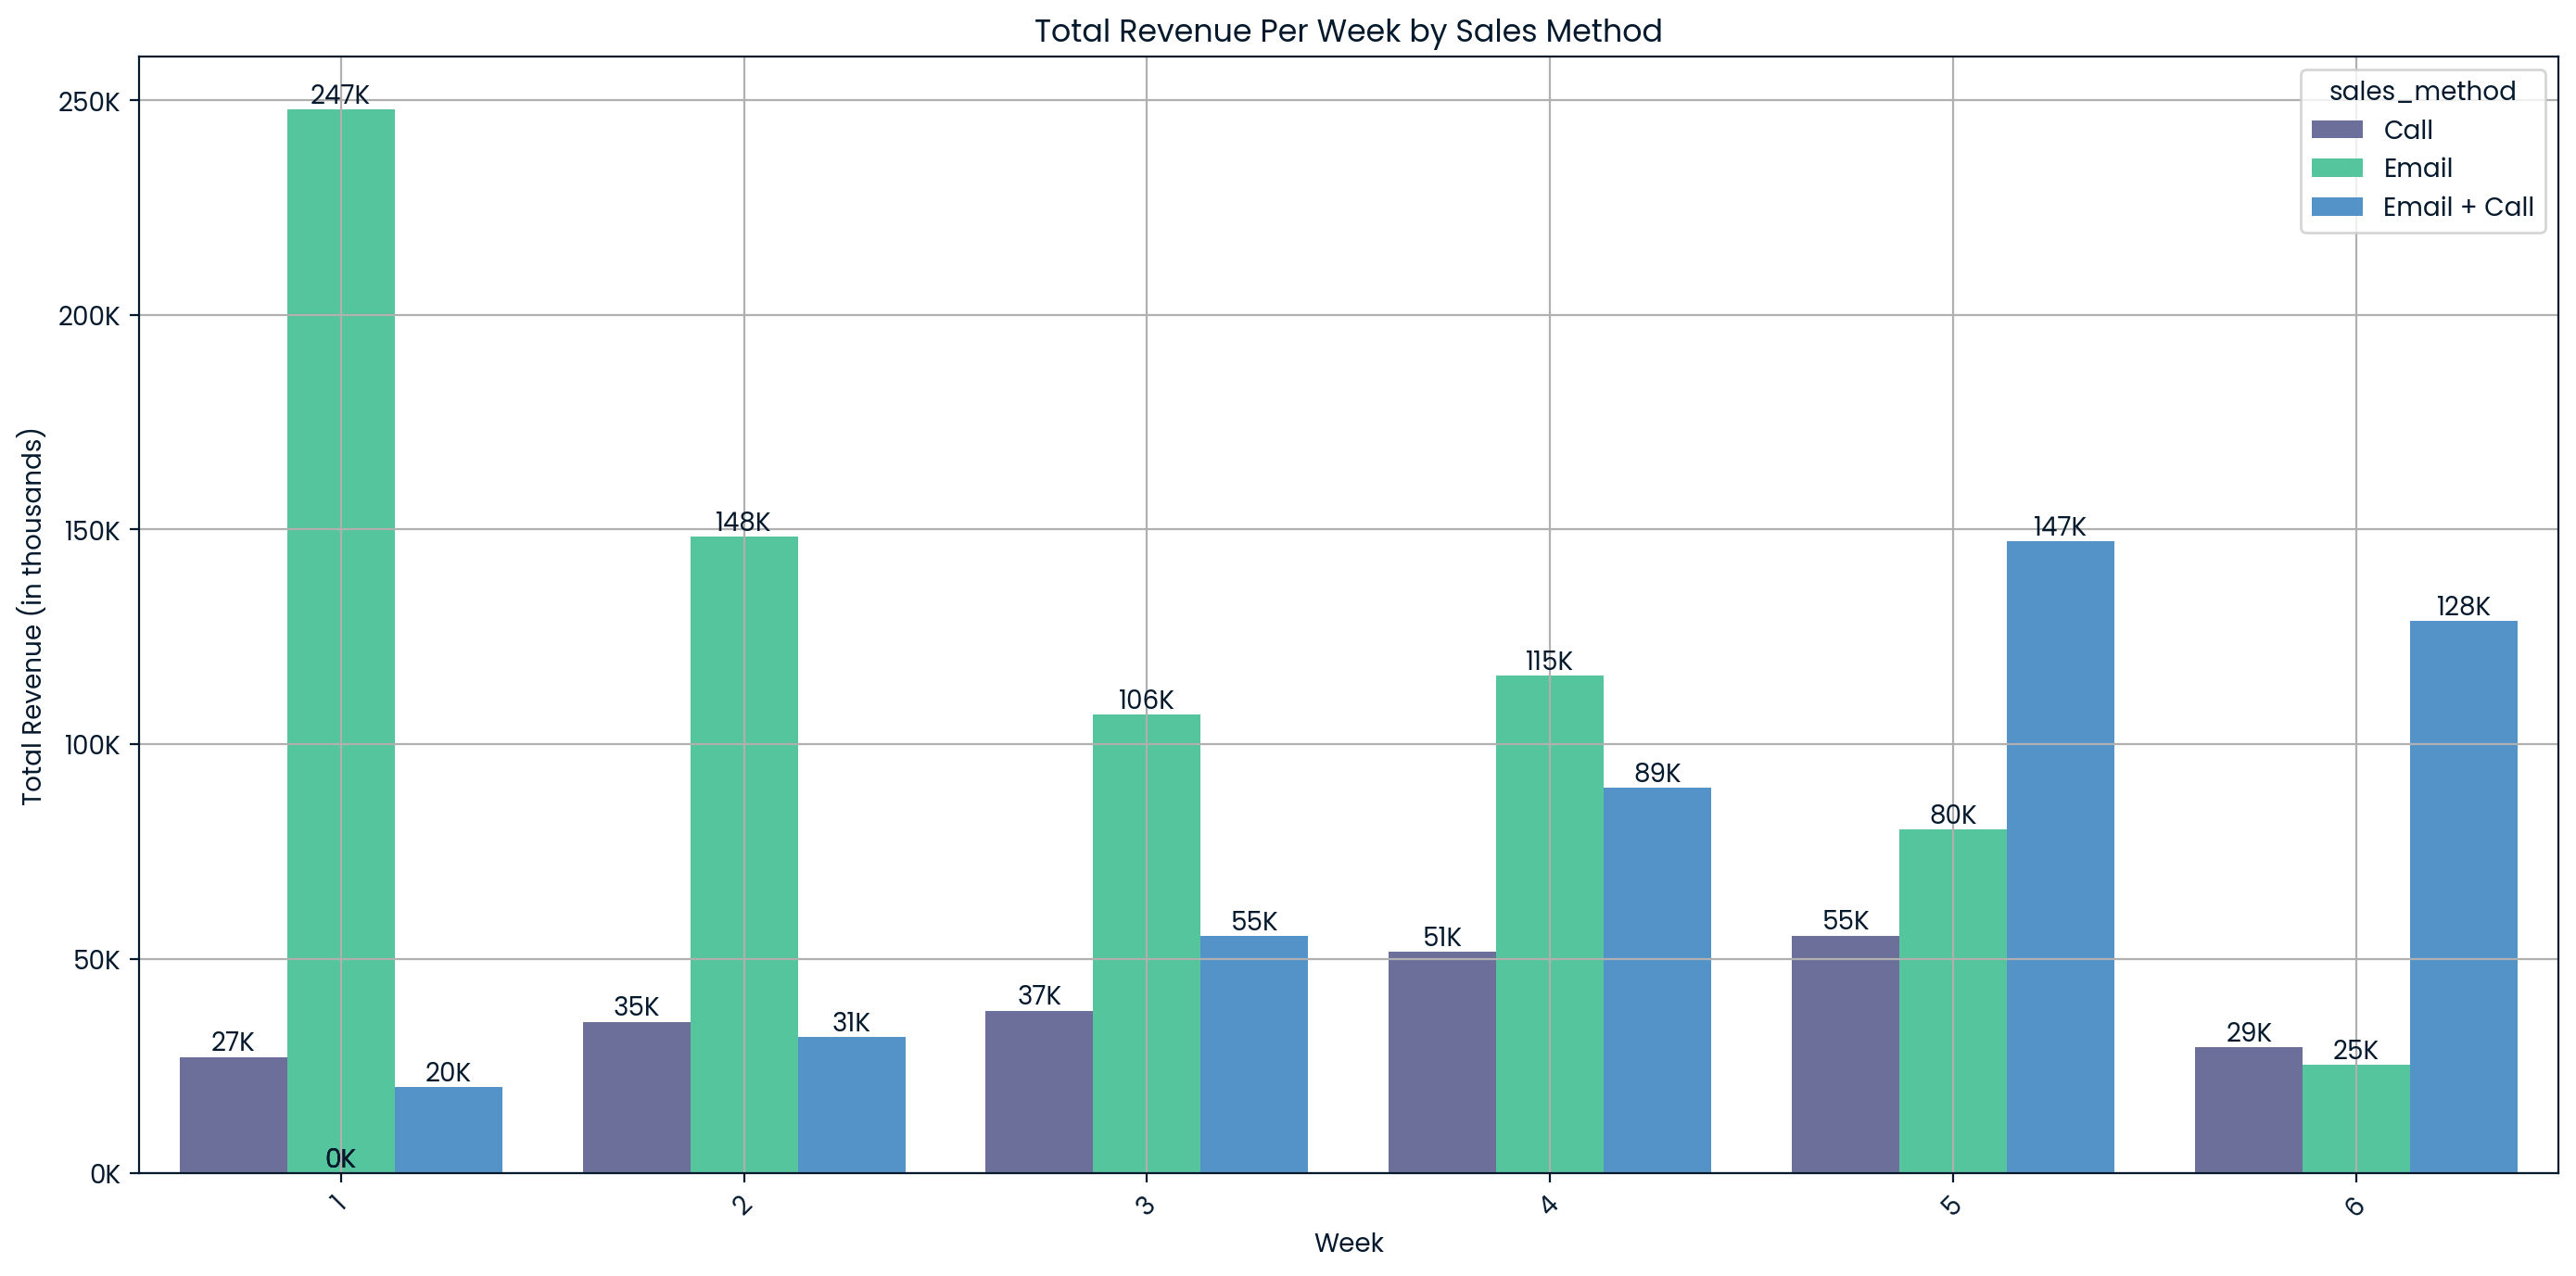

In [13]:
# Calculate average revenue per method weekly
total_revenue = product_sales.groupby(['sales_method', 'week'])['revenue'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 7))

# Create a bar plot with hue as sales_method
bar_plot = sns.barplot(data=total_revenue, x='week', y='revenue', hue='sales_method')

# Format the y-axis to show values in thousands (e.g., "1K")
formatter = FuncFormatter(lambda x, _: f'{int(x / 1000)}K')
plt.gca().yaxis.set_major_formatter(formatter)

# Add titles and labels
plt.title('Total Revenue Per Week by Sales Method')
plt.xlabel('Week')
plt.ylabel('Total Revenue (in thousands)')
plt.xticks(rotation=45)
plt.grid()

# Enumerate bars with their corresponding values
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height() / 1000)}K',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()


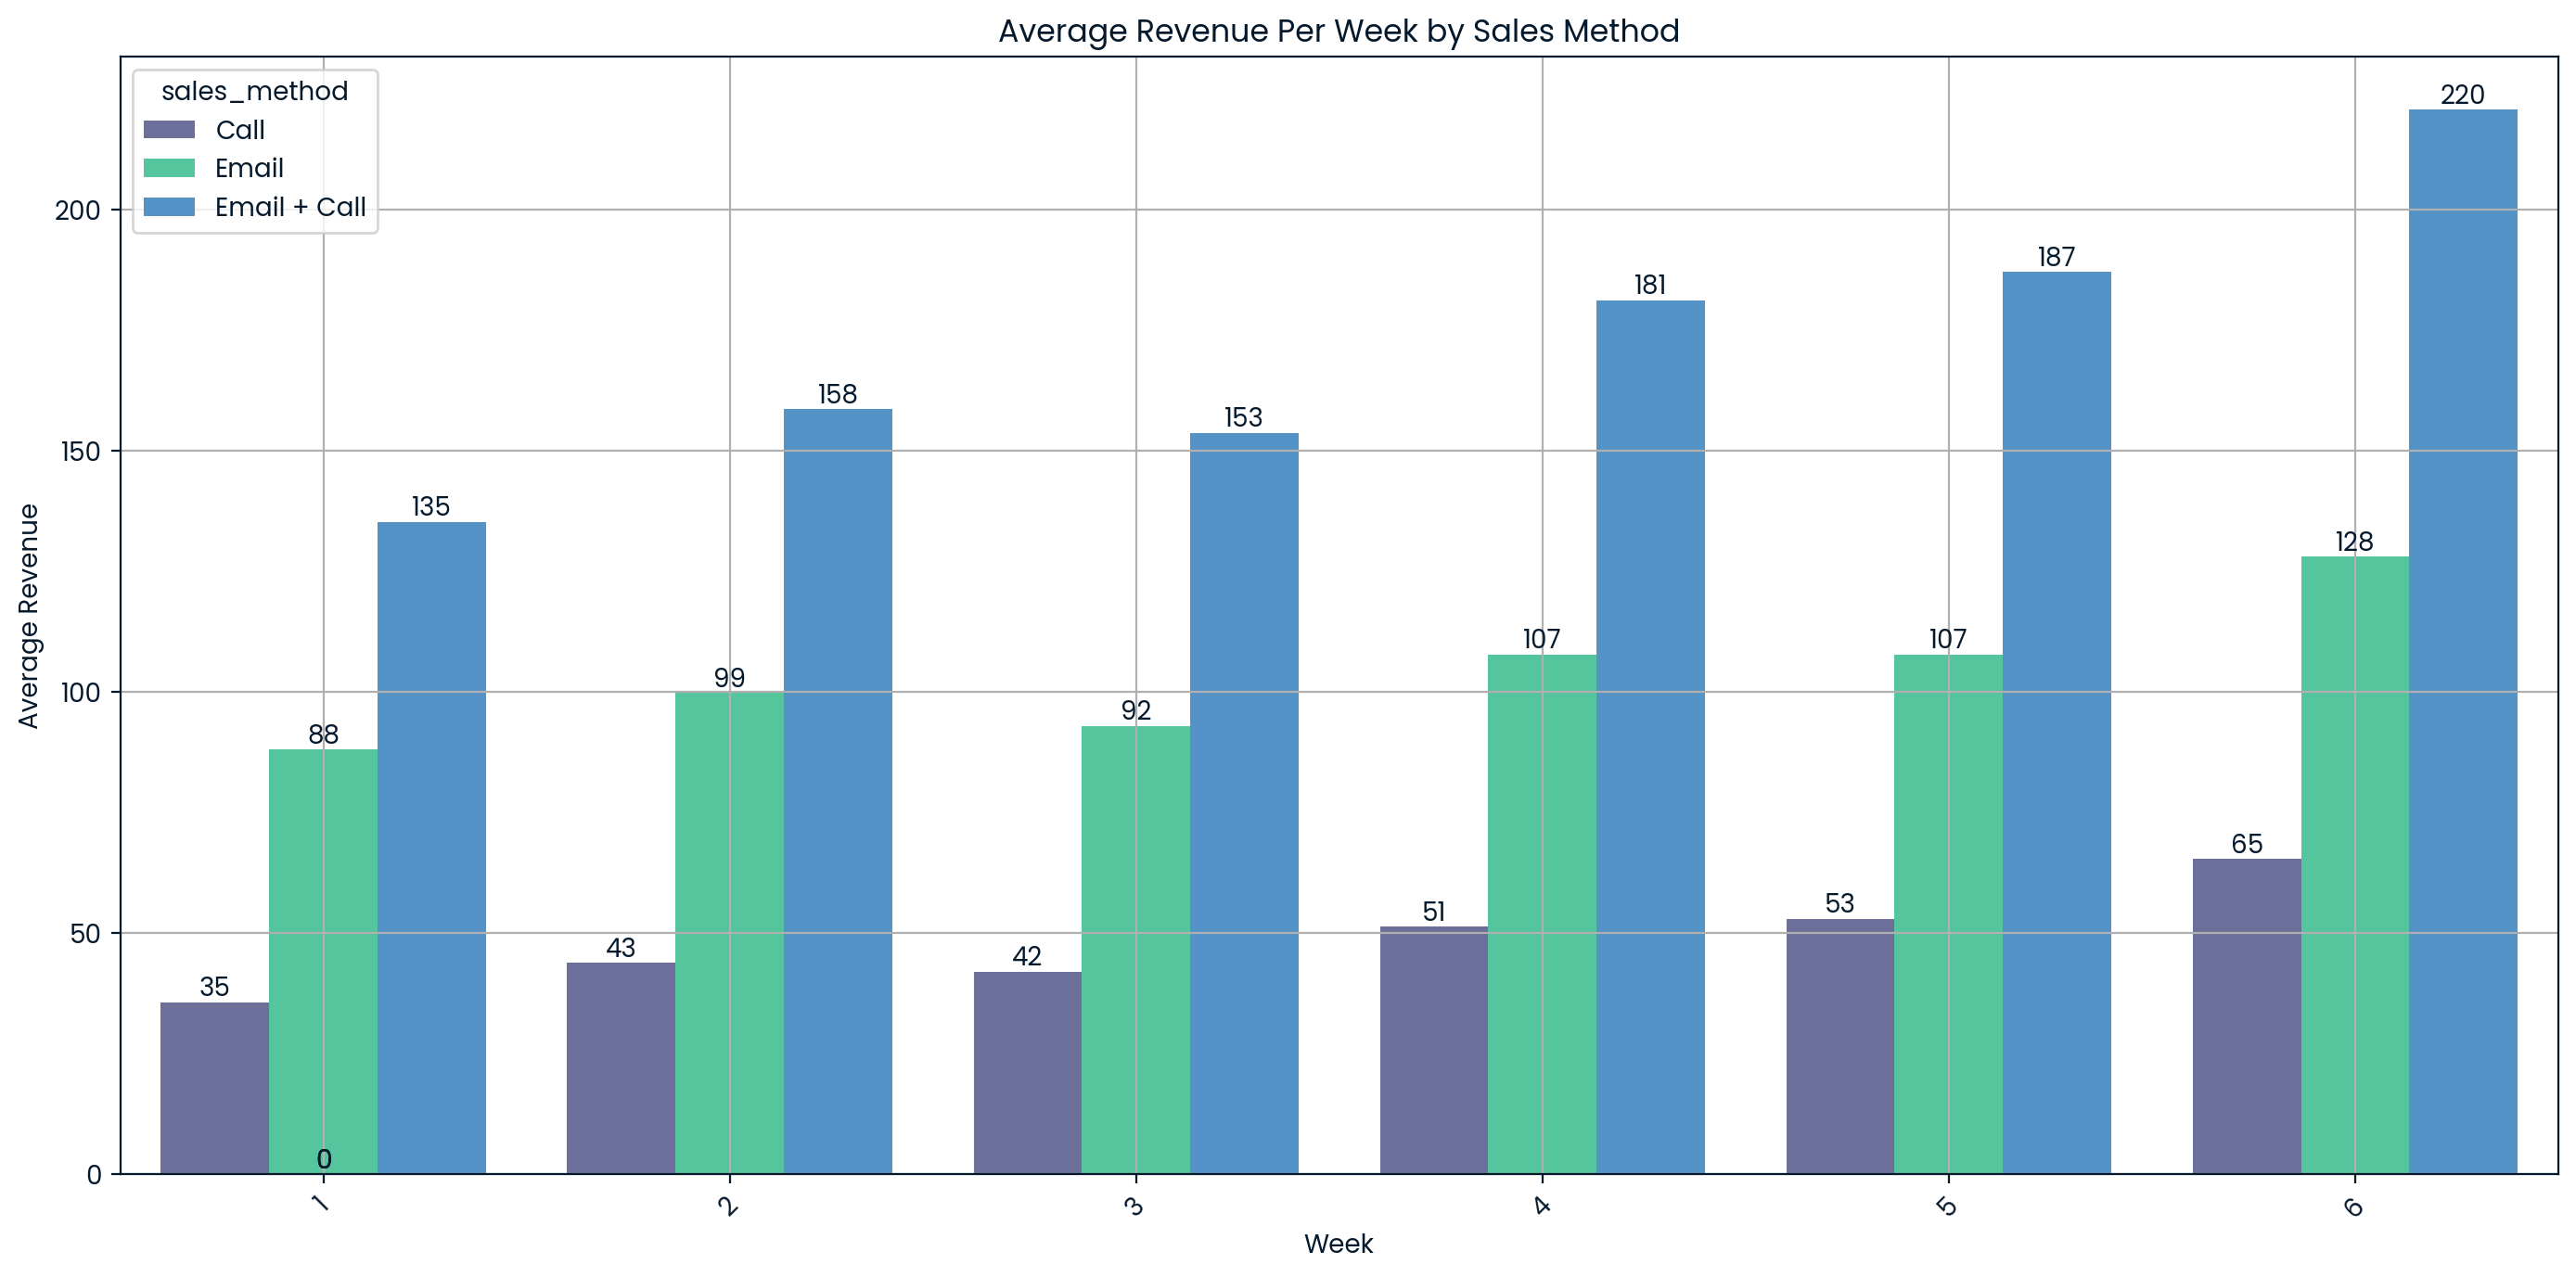

In [23]:
# Calculate average revenue per method weekly
average_revenue = product_sales.groupby(['sales_method', 'week'])['revenue'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 7))

# Create a bar plot with hue as sales_method
bar_plot = sns.barplot(data=average_revenue, x='week', y='revenue', hue='sales_method')

# Add titles and labels
plt.title('Average Revenue Per Week by Sales Method')
plt.xlabel('Week')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.grid()

# Enumerate bars with their corresponding values
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height() )}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

### Other Differences

Share by state doesn't differ very much

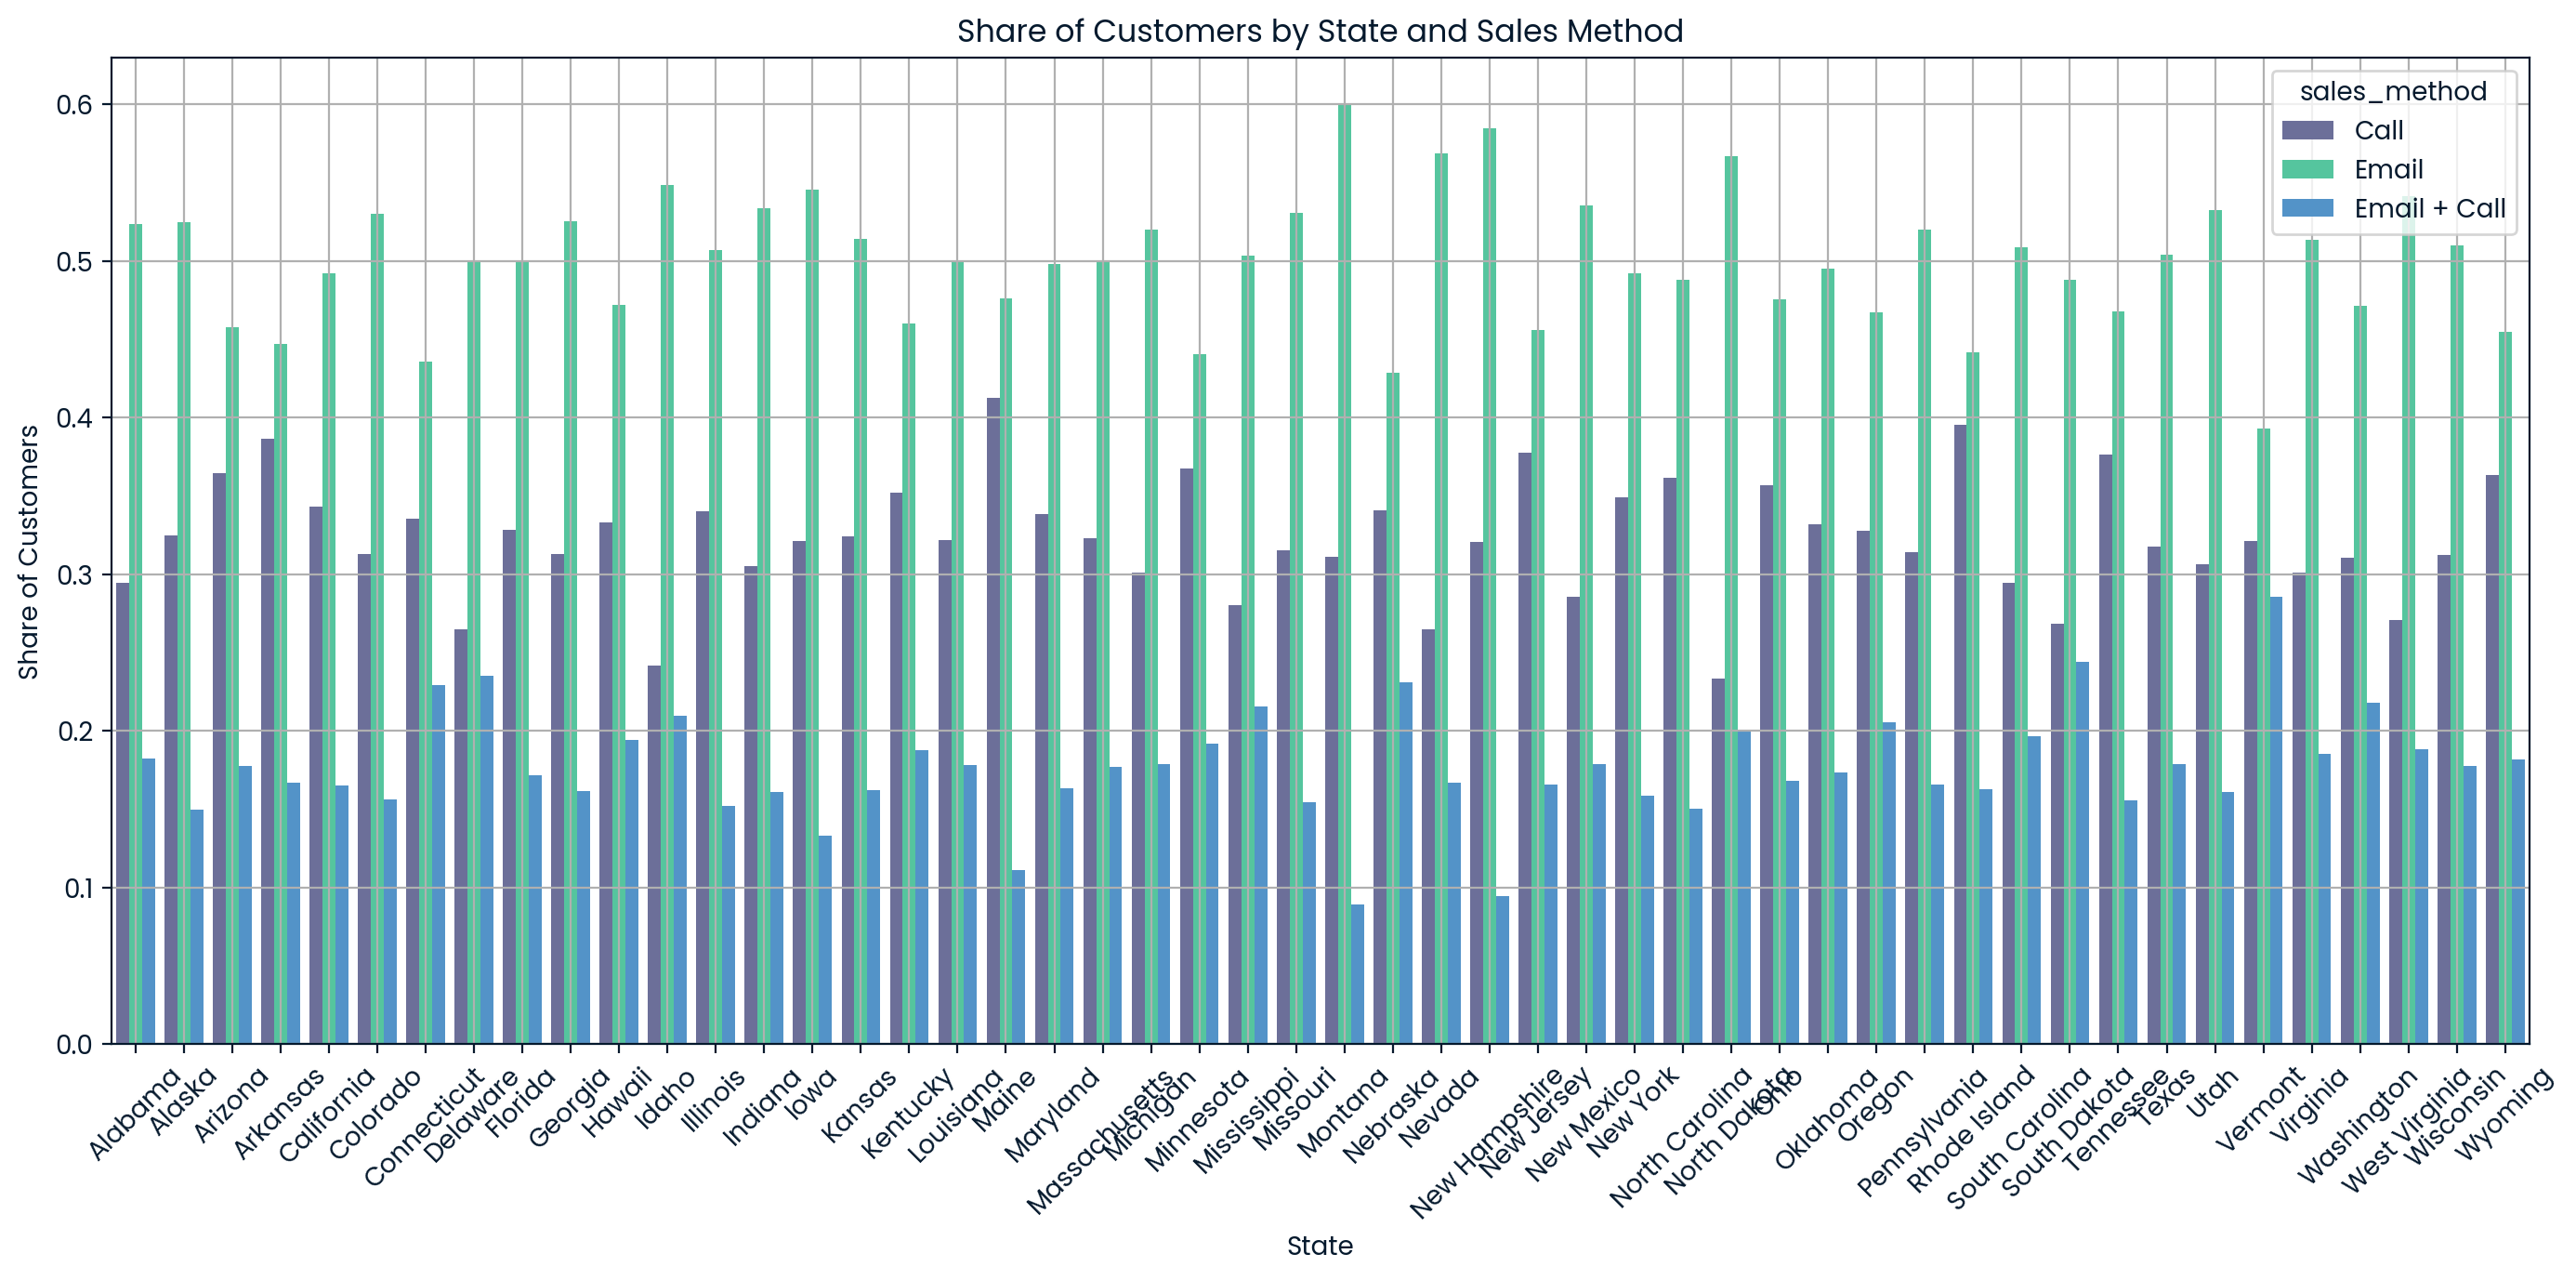

In [15]:

# Calculate the number of customers by state and sales method
customer_counts = product_sales.groupby(['state', 'sales_method'])['customer_id'].nunique().reset_index()

# Calculate total customers per state for share calculation
total_customers_per_state = product_sales.groupby('state')['customer_id'].nunique().reset_index()
total_customers_per_state.rename(columns={'customer_id': 'total_customers'}, inplace=True)

# Merge to calculate share
merged_data = pd.merge(customer_counts, total_customers_per_state, on='state')
merged_data['share'] = merged_data['customer_id'] / merged_data['total_customers']

# Plotting
plt.figure(figsize=(14, 7))

# Create a bar plot with hue as sales_method
sns.barplot(data=merged_data, x='state', y='share', hue='sales_method')

# Add titles and labels
plt.title('Share of Customers by State and Sales Method')
plt.xlabel('State')
plt.ylabel('Share of Customers')
plt.xticks(rotation=45)
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()


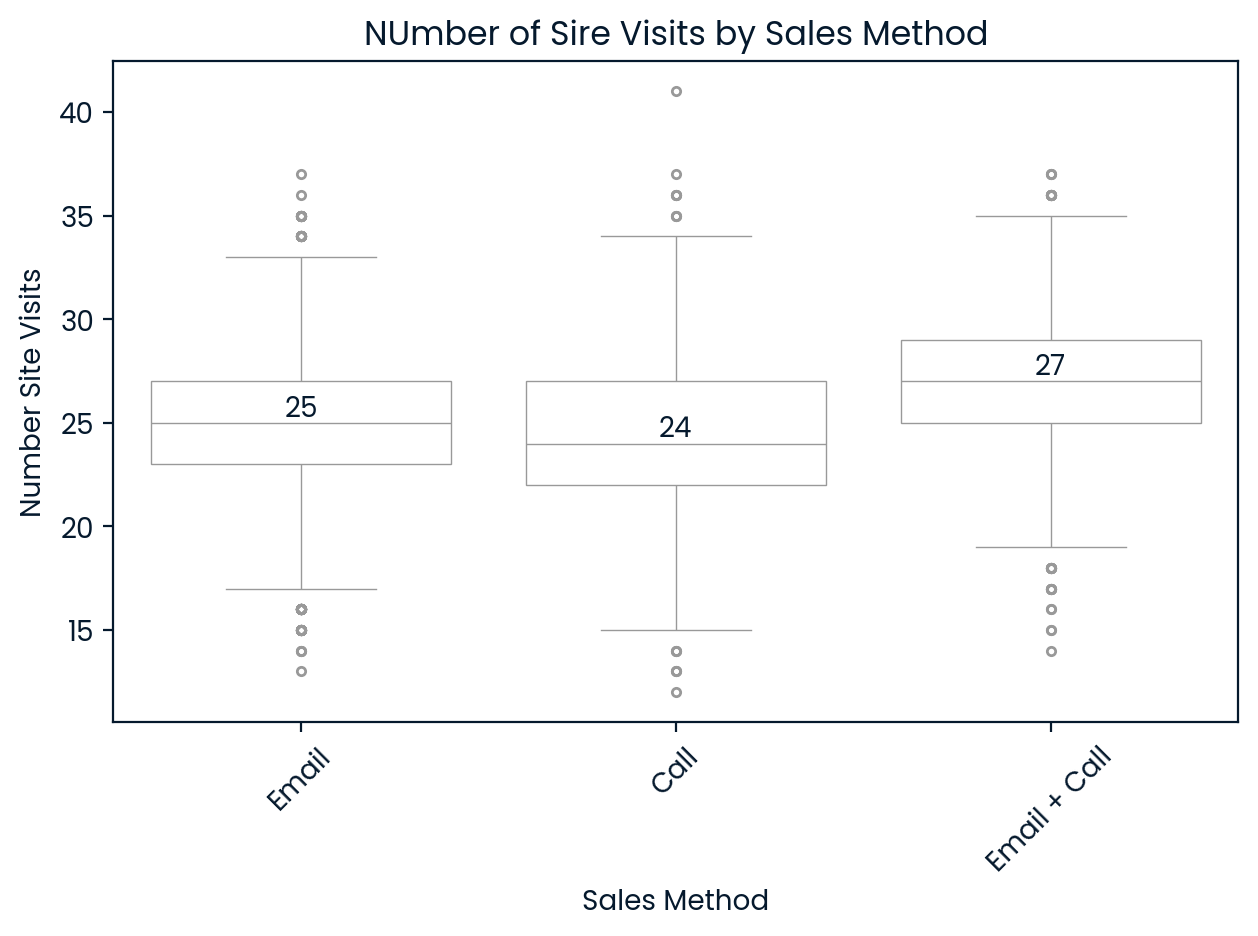

In [16]:

# Revenue
sales_per_method = product_sales['sales_method'].value_counts().index.tolist()

# Create a box plot ordered by sales count
sns.boxplot(data=product_sales, x='sales_method', y='nb_site_visits', order= sales_per_method, color='white', linewidth=0.5, fliersize=3)

# Add a label with the price
medians = product_sales.groupby('sales_method')['nb_site_visits'].median()

for i, median in enumerate(medians[sales_per_method]):
    # print(i, median)
    plt.text(i, median, str(int(median)), horizontalalignment='center', verticalalignment='bottom')

# Add labels and title
plt.xlabel('Sales Method')
plt.ylabel('Number Site Visits')
plt.title('NUmber of Sire Visits by Sales Method')

# Display the chart
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

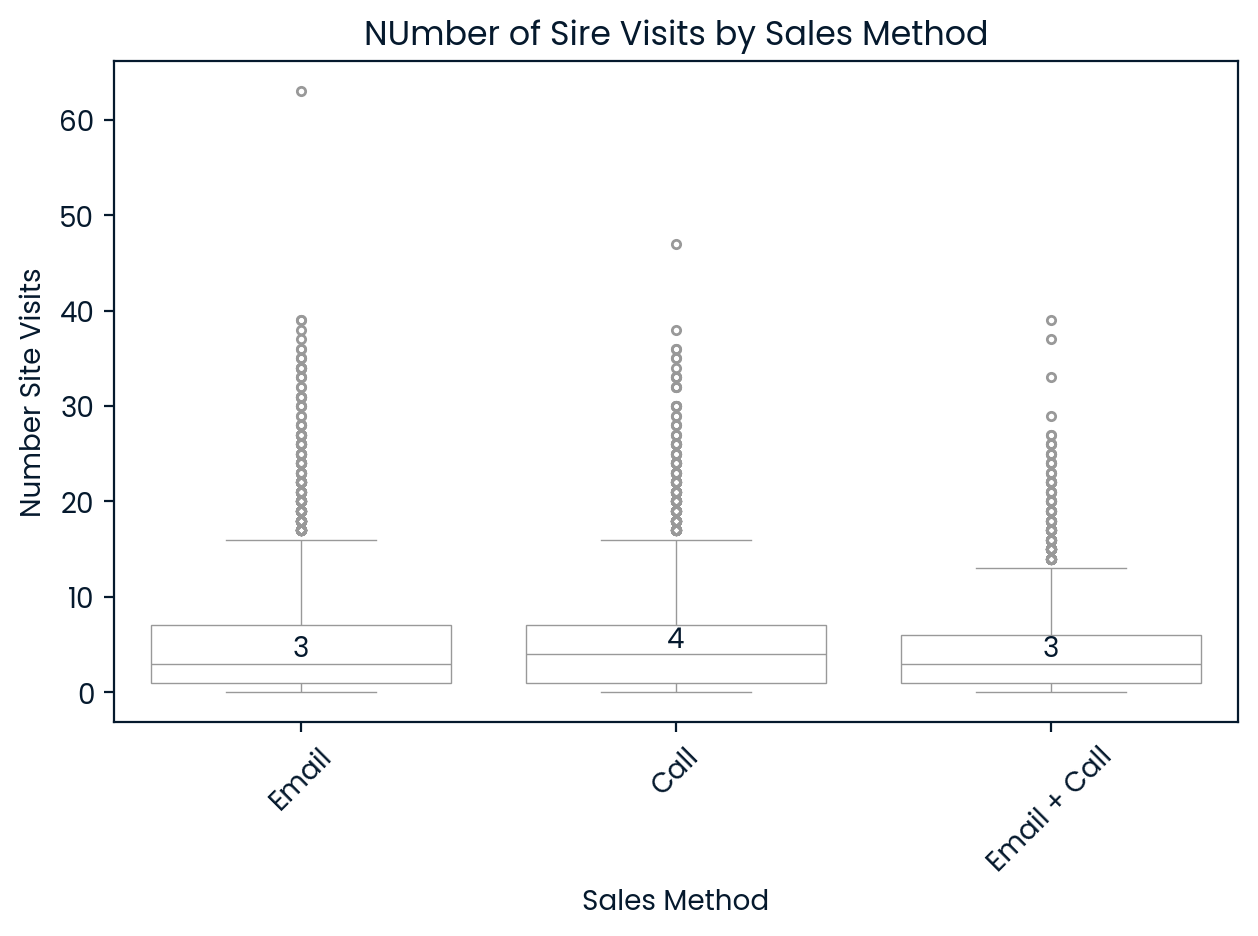

In [17]:

# Revenue
sales_per_method = product_sales['sales_method'].value_counts().index.tolist()

# Create a box plot ordered by sales count
sns.boxplot(data=product_sales, x='sales_method', y='years_as_customer', order= sales_per_method, color='white', linewidth=0.5, fliersize=3)

# Add a label with the price
medians = product_sales.groupby('sales_method')['years_as_customer'].median()

for i, median in enumerate(medians[sales_per_method]):
    # print(i, median)
    plt.text(i, median, str(int(median)), horizontalalignment='center', verticalalignment='bottom')

# Add labels and title
plt.xlabel('Sales Method')
plt.ylabel('Number Site Visits')
plt.title('NUmber of Sire Visits by Sales Method')

# Display the chart
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

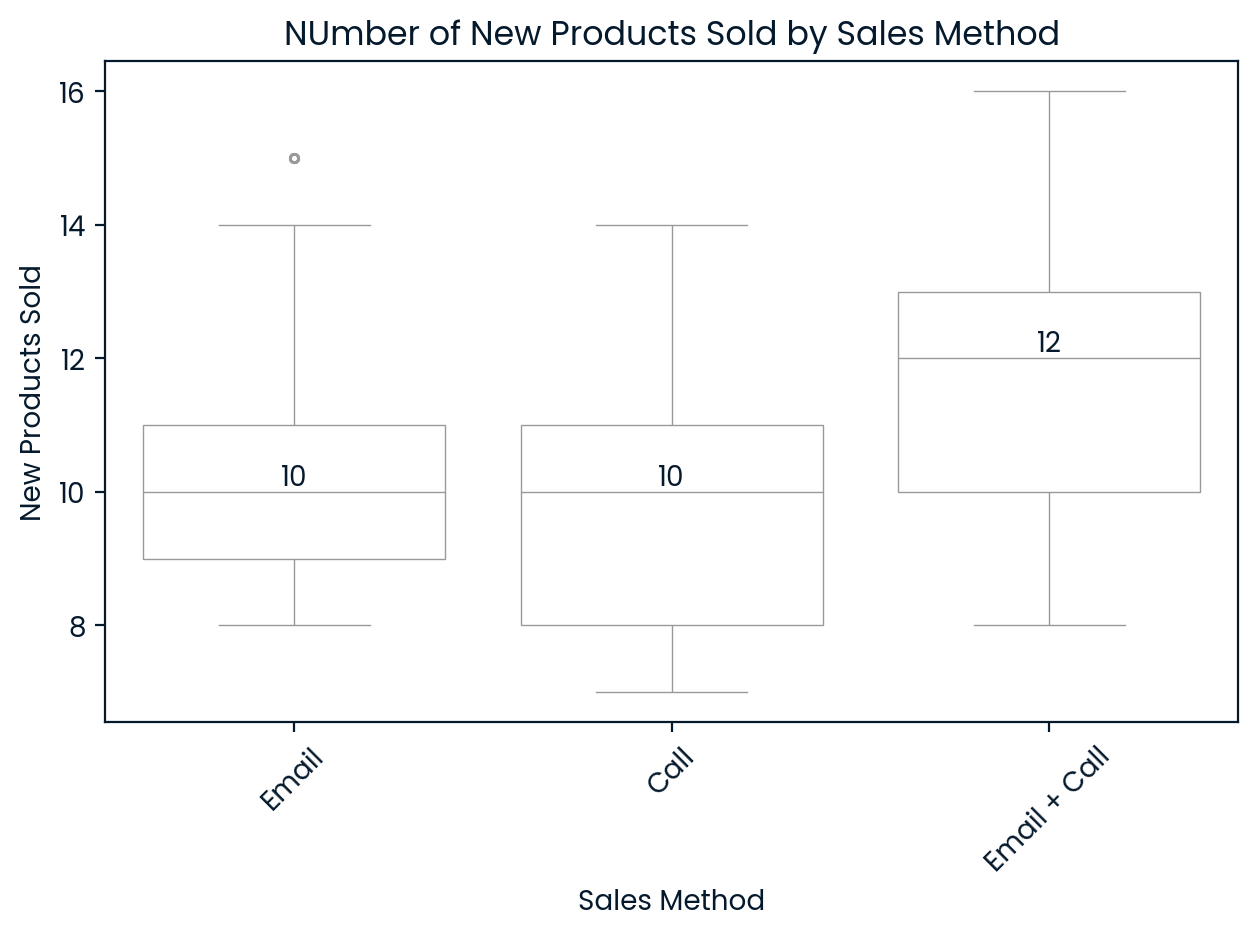

In [18]:

# Revenue
sales_per_method = product_sales['sales_method'].value_counts().index.tolist()

# Create a box plot ordered by sales count
sns.boxplot(data=product_sales, x='sales_method', y='nb_sold', order= sales_per_method, color='white', linewidth=0.5, fliersize=3)

# Add a label with the price
medians = product_sales.groupby('sales_method')['nb_sold'].median()

for i, median in enumerate(medians[sales_per_method]):
    # print(i, median)
    plt.text(i, median, str(int(median)), horizontalalignment='center', verticalalignment='bottom')

# Add labels and title
plt.xlabel('Sales Method')
plt.ylabel('New Products Sold')
plt.title('NUmber of New Products Sold by Sales Method')

# Display the chart
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()